In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Sea_level_pressure.parquet.gzip")

data = pd.read_parquet(datafile_path)
data /= 100

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,1030.443604,1030.480469,1030.518066,1030.556274,1030.595337,1030.634888,1030.675293,1030.716187,1030.757690,1030.799805,...,1030.116699,1030.145752,1030.175659,1030.206421,1030.237915,1030.270264,1030.303345,1030.337280,1030.371948,1030.407471
-88.3125,1029.910889,1030.109131,1030.269287,1030.303711,1030.338257,1030.373047,1030.407959,1030.443115,1030.478394,1030.513794,...,1027.370361,1027.641357,1027.914429,1028.189575,1028.466675,1028.745728,1029.026367,1029.308594,1029.521851,1029.715210
-87.1875,1027.166138,1027.492676,1027.819580,1028.146484,1028.473389,1028.804810,1029.143066,1029.480835,1029.817871,1030.154053,...,1023.405396,1023.841003,1024.280273,1024.723145,1025.169312,1025.541260,1025.864746,1026.189087,1026.514160,1026.839966
-86.0625,1026.606567,1027.250488,1027.895264,1028.540527,1029.186157,1029.831787,1030.422607,1030.887695,1031.350342,1031.768311,...,1020.241089,1020.884949,1021.511902,1022.141846,1022.773743,1023.407654,1024.043945,1024.682129,1025.322144,1025.963745
-84.9375,1026.303955,1027.043823,1027.488892,1027.936768,1028.387451,1028.840454,1029.295898,1029.753418,1030.212769,1030.674072,...,1015.341553,1016.478882,1017.623230,1018.774170,1019.931152,1021.093933,1022.261963,1023.434692,1024.611816,1025.493408


In [19]:
columns = data.columns.to_numpy()
min_col_idx, max_col_idx = 0, 0

for i in range(len(columns)):
    if float(columns[i]) > 90 and min_col_idx == 0:
        min_col_idx = i - 1
    if float(columns[i]) > 155 and max_col_idx == 0:
        max_col_idx = i

target_area_data = data.loc[-10:40, columns[min_col_idx:max_col_idx]]
target_area_arr = target_area_data.to_numpy()
max_press_val, min_press_val = target_area_arr.max(), target_area_arr.min()
print(max_press_val, min_press_val)
target_area_data.tail()

1020.37695 985.8633


,89.4375,90.5625,91.6875,92.8125,93.9375,95.0625,96.1875,97.3125,98.4375,99.5625,...,144.5625,145.6875,146.8125,147.9375,149.0625,150.1875,151.3125,152.4375,153.5625,154.6875
35.4375,992.568298,994.012756,993.797974,994.245789,993.039551,992.766541,992.319580,993.143127,993.514404,993.849976,...,1006.514771,1006.941895,1007.410522,1007.827026,1007.982178,1008.292175,1008.093750,1008.115051,1007.910522,1007.874634
36.5625,996.388123,996.489502,997.084717,997.985840,997.179688,996.546631,996.579346,997.112732,997.342285,1000.319519,...,1007.455017,1007.872314,1008.417236,1008.972656,1009.405640,1009.694214,1009.593750,1009.840637,1009.453979,1009.219849
37.6875,1000.559326,1002.286011,1002.440308,1001.915527,1001.432251,1000.407898,1000.933105,1001.351013,1002.979065,1005.180420,...,1009.070129,1009.618958,1010.156494,1010.857483,1011.244507,1011.996033,1012.111328,1012.134277,1011.744324,1011.443542
38.8125,1008.634827,1008.077820,1008.457825,1007.690308,1006.614441,1005.912659,1006.067444,1007.052551,1007.884705,1008.774536,...,1010.634460,1011.193298,1011.863464,1012.842712,1013.609680,1014.255920,1014.309387,1014.453735,1014.331177,1014.128906
39.9375,1015.563904,1014.920959,1014.006958,1013.122437,1012.866821,1012.152954,1011.742188,1012.671692,1013.191895,1013.520264,...,1012.335754,1013.243591,1013.964478,1014.880066,1015.431885,1016.225464,1016.602173,1016.941711,1017.197876,1017.233582


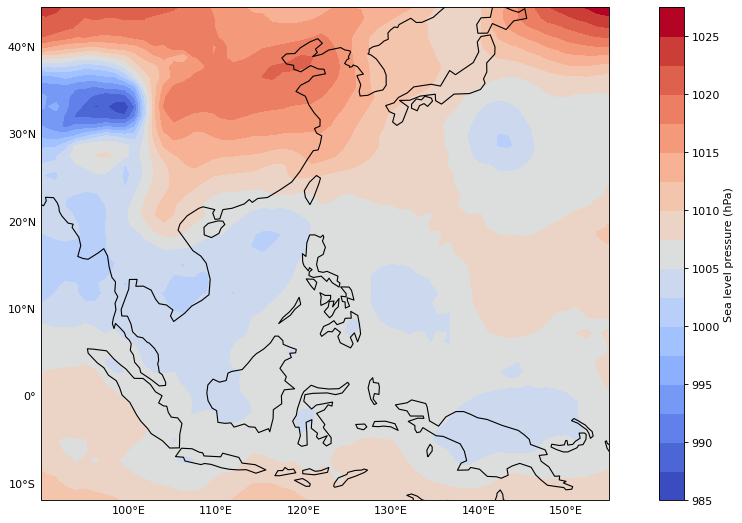

In [23]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = np.arange(985, 1030, 2.5)
cmap = cm.coolwarm
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Sea level pressure (hPa)")

plt.show()
plt.close()

In [22]:
clevs

array([ 985. ,  987.5,  990. ,  992.5,  995. ,  997.5, 1000. , 1002.5,
       1005. , 1007.5, 1010. , 1012.5, 1015. , 1017.5, 1020. , 1022.5,
       1025. ])